In [1]:
import sys
sys.path.append('..')

from processing.load import load_aligned
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd
import seaborn as sns


from processing.consts import CHANNEL_NAMES

In [8]:
im_name = "mandrac-green-marina_11_0101_30" #"mandrac-green-sea_11_0102_10"

image = load_aligned("/home/anna/Datasets/annotated/mandrac/images/train", im_name)
img_RGB = cv2.imread("/home/anna/Datasets/annotated/mandrac/images/train/" + im_name + "_RGB.png")
img_RGB = cv2.cvtColor(img_RGB, cv2.COLOR_BGR2RGB)

features = image.reshape(-1, 6)

features.shape

(4637065, 6)

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

# alg = KMeans(n_clusters=6)
alg = DBSCAN(eps=0.1, min_samples=10)

alg.feature_names_in_ = CHANNEL_NAMES

alg.fit(features)

/home/anna/miniconda3/envs/micasense/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

/tmp/ipykernel_1519676/3691483997.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Dark2', len(unique_labels))


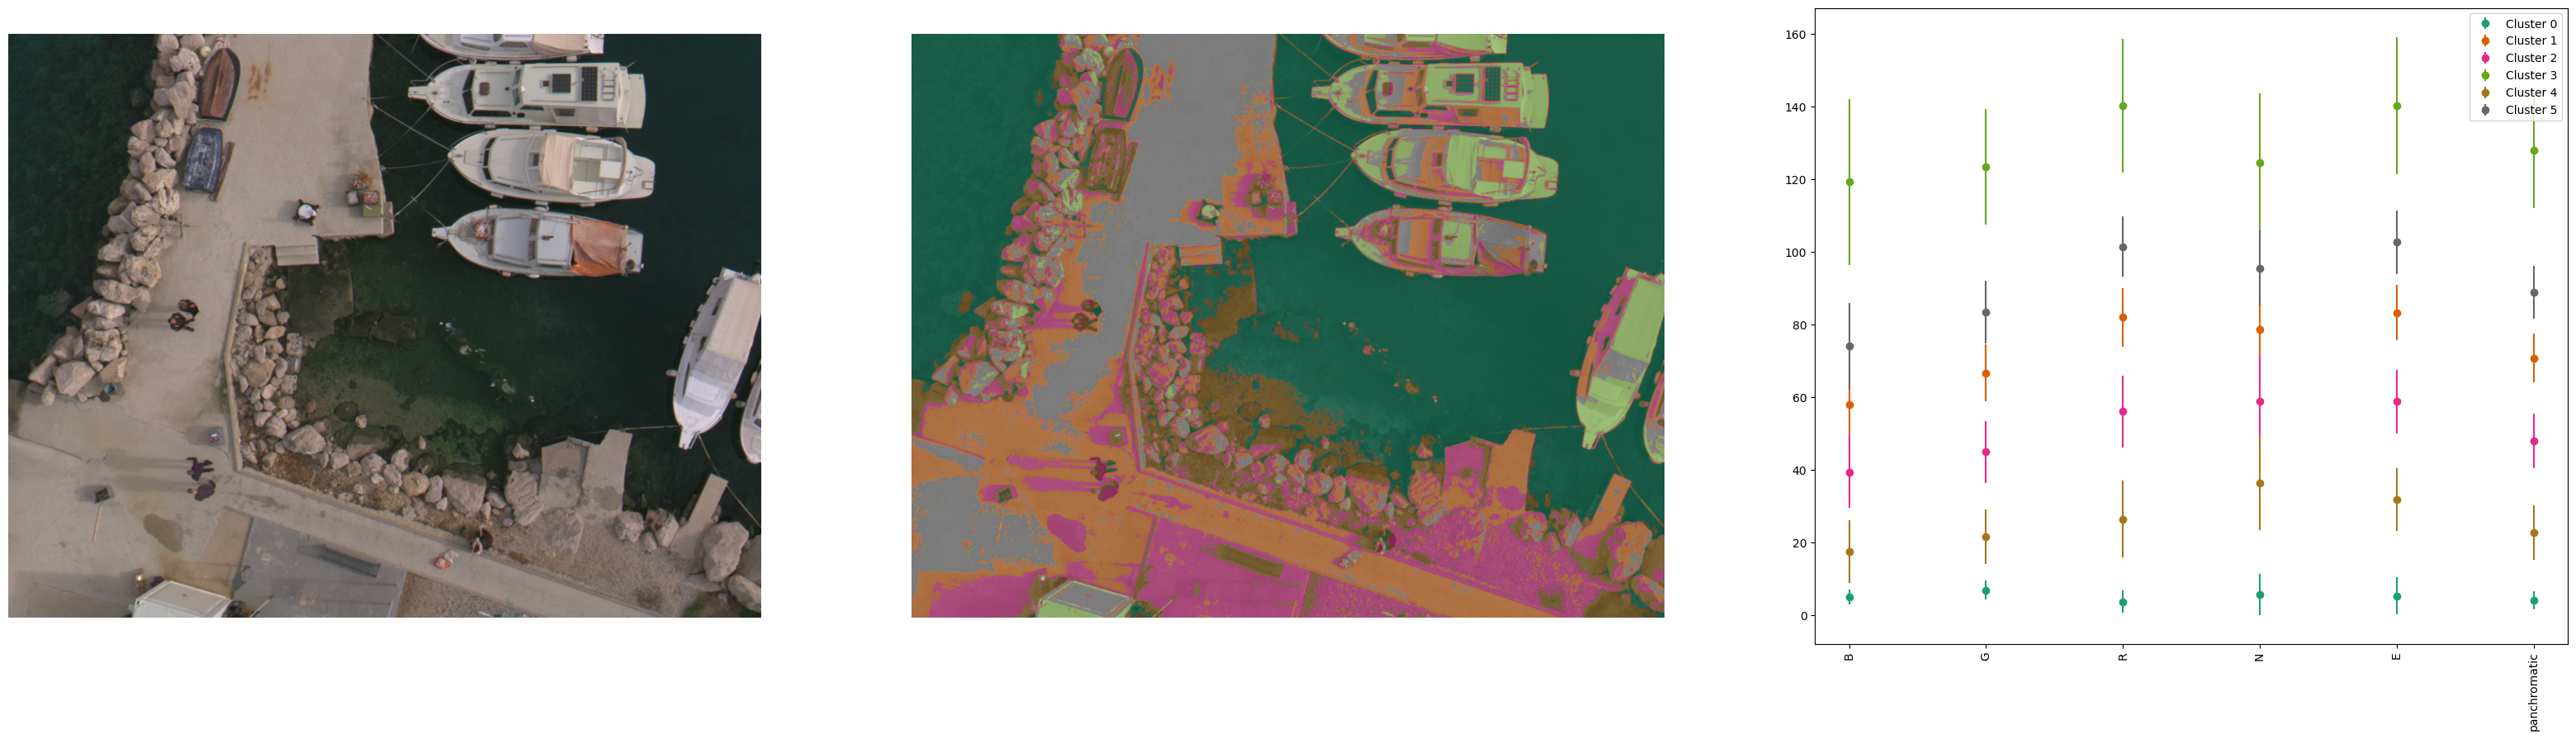

In [15]:
unique_labels = np.unique(alg.labels_)
means = np.array([features[alg.labels_ == i].mean(axis=0) for i in range(alg.n_clusters)])
stds = np.array([features[alg.labels_ == i].std(axis=0) for i in range(alg.n_clusters)])
cmap = plt.cm.get_cmap('Dark2', len(unique_labels))  


plt.subplots(1, 3, figsize=(40,10))
plt.subplot(1, 3, 1)
plt.imshow(img_RGB)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY), cmap='gray')
plt.imshow(alg.labels_.reshape(image.shape[:2]), alpha=0.5, cmap=cmap)
plt.axis('off')

plt.subplot(1, 3, 3)

for i in range(alg.n_clusters):
    plt.errorbar(range(features.shape[1]), means[i], yerr=stds[i], fmt='o', label=f'Cluster {i}', color=cmap(i))

plt.xticks(range(features.shape[1]), CHANNEL_NAMES + ["panchromatic"], rotation=90)
plt.legend()
plt.show()
